## **Description**

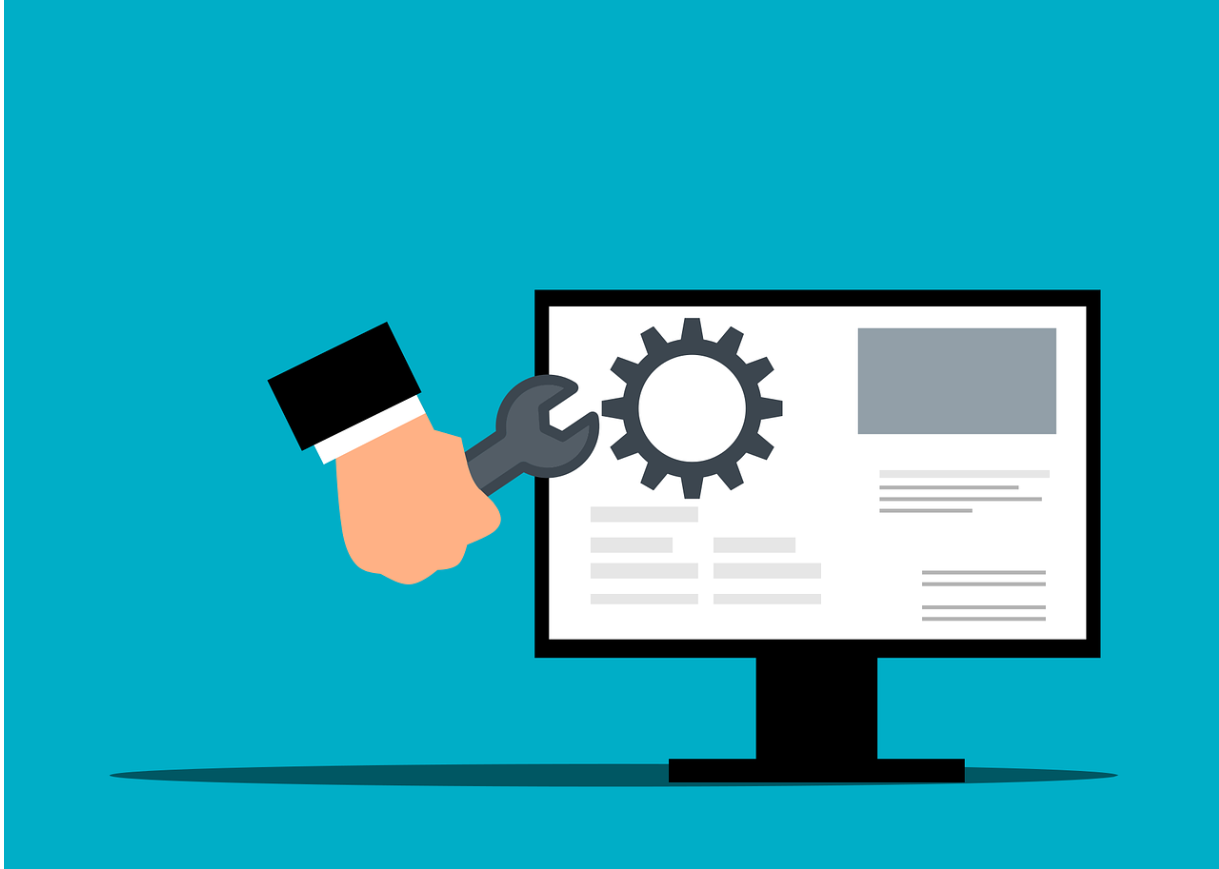

## **Business Context**
In today's dynamic business landscape, organizations are increasingly recognizing the pivotal role customer feedback plays in shaping the trajectory of their products and services. The ability to swiftly and **effectively respond to customer** input not only fosters enhanced customer experiences but also serves as a catalyst for growth, prolonged customer engagement, and the nurturing of lifetime value relationships.
As a dedicated Product Manager or Product Analyst, staying attuned to the voice of your customers is not just a best practice; it's a strategic imperative.
While your organization may be inundated with a wealth of customer-generated feedback and support tickets, your role entails much more than just processing these inputs. To make your efforts in managing customer experience and expectations truly impactful, you need a structured approach – a method that allows you to discern the most pressing issues, set priorities, and allocate resources judiciously.
One of the most effective strategies at your disposal as an organization is to harness the power of automated Support Ticket Categorization - **done in the modern day using Large Language Models and Generative AI.**

## **Objective**
Develop a Generative AI application using a Large Language Model to automate the classification and processing of support tickets. **The application will aim to predict ticket categories, assign priority, suggest estimated resolution times, and store the results in a structured DataFrame.**


### **Installing and Importing Necessary Libraries**

In [ ]:
# Installation for GPU llama-cpp-python
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python --force-reinstall --upgrade --no-cache-dir -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.0/38.0 MB 95.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 81.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 220.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.2/133.2 kB 253.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.2.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvid

In [ ]:
# Install the hugging face hub
!pip install huggingface_hub -q

In [ ]:
# Importing library for data manipulation
import pandas as pd

# Function to download the model from the Hugging Face model hub
from huggingface_hub import hf_hub_download

# Importing the Llama class from the llama_cpp module
from llama_cpp import Llama

# Importing the json module
import json










### **1. Data Overview**:
*'*Load the dataset - Print the overview of the data (first few rows, shape, etc)**

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
file_path="/content/drive/MyDrive/Support ticket text data mid term.csv"
data = pd.read_csv(file_path)

In [ ]:
# Print the first few rows
print("First few rows of the dataset:")
data.head()

First few rows of the dataset:


,support_tick_id,support_ticket_text
0,ST2023-006,My internet connection has significantly slowe...
1,ST2023-007,Urgent help required! My laptop refuses to sta...
2,ST2023-008,I've accidentally deleted essential work docum...
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...
4,ST2023-010,"My smartphone battery is draining rapidly, eve..."


In [ ]:
# Print the shape of the DataFrame
print("\nShape of the dataset:")
print(data.shape)


Shape of the dataset:
(21, 2)


 - We have 21 rows and 2 columns in the data.

In [ ]:
# Check for missing values
missing_values= data.isnull().sum()

if missing_values.any():
    print("There are missing values.")
else:
    print("There are no missing values.")

There are no missing values.


### **Model building**
**Load the model from Hugging Face - Create a function to define the model parameters and generate a response**

In [ ]:
# Loading the model
model_name_or_path = "TheBloke/Llama-2-13B-chat-GGUF"
model_basename = "llama-2-13b-chat.Q5_K_M.gguf"

In [ ]:
# Download the model from the Hugging Face Hub using the 'hf_hub_download' function
# by specifying the 'repo_id' and 'filename'

model_path = hf_hub_download(
    repo_id=model_name_or_path,
    filename=model_basename
    )

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


llama-2-13b-chat.Q5_K_M.gguf:   0%|          | 0.00/9.23G [00:00<?, ?B/s]

In [ ]:
# Create an instance of the 'Llama' class with specified parameters
lcpp_llm = Llama(
        model_path=model_path,
        n_threads=2,  # CPU cores
        n_batch=512,  # Should be between 1 and n_ctx, consider the amount of VRAM in your GPU.
        n_gpu_layers=43,  # Change this value based on your model and your GPU VRAM pool.
        n_ctx=4096,  # Context window
    )

llama_model_loader: loaded meta data with 19 key-value pairs and 363 tensors from /root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGUF/snapshots/4458acc949de0a9914c3eab623904d4fe999050a/llama-2-13b-chat.Q5_K_M.gguf (version GGUF V2)
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = LLaMA v2
llama_model_loader: - kv   2:                       llama.context_length u32              = 4096
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 5120
llama_model_loader: - kv   4:                          llama.block_count u32              = 40
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 13824
llama_model_loader: - kv   6:                 llama.rope.dimension_

In [ ]:
def generate_llama_response(instruction, review):

    # System message explicitly instructing not to include the review text
    system_message = """
        [INST]<<SYS>>
        {}
        <</SYS>>[/INST]
    """.format(instruction)

    # Combine user_prompt and system_message to create the prompt
    prompt = f"{review}\n{system_message}"

    # Generate a response from the LLaMA model
    response = lcpp_llm(
        prompt=prompt,
        max_tokens=1024,
        temperature=0.01,
        top_p=0.95,
        repeat_penalty=1.2,
        top_k=50,
        stop=['INST'],
        echo=False,
        seed=42,
    )

    # Extract the sentiment from the response
    response_text = response["choices"][0]["text"]
    return response_text

### **Defining Model Response Parameters**

### **Task 1 - Ticket Categorization**
**Define the instruction for the task - Apply the generate response function to get an output from the model - Create a DataFrame containing the necessary fields from the model's output in a structured manner**

In [ ]:
# create a copy of the data
data_1 = data.copy()

In [ ]:
instruction_1 = """
[INST]<<SYS>>
You are acting as a guide for a technical assistant. As a technical assistant, your primary task is to classify support tickets into specific categories. There are three categories:

Technical Issues
Hardware Issues
Data Recovery.
Please categorize the support ticket into the relevant category.

Here is an example:

support_ticket_text: My internet connection is very slow for the last 3 days. Therefore, it is hard for me to work efficiently from home.
I am also facing frequent disconnections. Can you please help me to resolve this issue promptly.
Please categorize the support ticket into one of the predefined categories (Technical Issues, Hardware Issues, or Data Recovery). Other responses are not acceptable.
<</SYS>>[/INST]
"""

In [ ]:
data_1['llama_response'] = data_1['support_ticket_text'].apply(lambda x: generate_llama_response(instruction_1,x))


llama_print_timings:        load time =     895.18 ms
llama_print_timings:      sample time =      35.77 ms /    53 runs   (    0.67 ms per token,  1481.61 tokens per second)
llama_print_timings: prompt eval time =     894.55 ms /   260 tokens (    3.44 ms per token,   290.65 tokens per second)
llama_print_timings:        eval time =    2447.34 ms /    52 runs   (   47.06 ms per token,    21.25 tokens per second)
llama_print_timings:       total time =    3543.58 ms /   312 tokens
Llama.generate: prefix-match hit

llama_print_timings:        load time =     895.18 ms
llama_print_timings:      sample time =      32.30 ms /    53 runs   (    0.61 ms per token,  1640.71 tokens per second)
llama_print_timings: prompt eval time =     624.11 ms /   258 tokens (    2.42 ms per token,   413.39 tokens per second)
llama_print_timings:        eval time =    2465.41 ms /    52 runs   (   47.41 ms per token,    21.09 tokens per second)
llama_print_timings:       total time =    3277.21 ms /   310 

In [ ]:
data_1['llama_response'][0]

' Based on the information provided in the support ticket, I would categorize it as a Technical Issue. The slow internet connection and frequent disconnections suggest a problem with the connectivity or network configuration, which falls under the umbrella of technical issues.'

In [ ]:
# check the first five rows of the data to confirm whether the new column has been added
data_1.head()

,support_tick_id,support_ticket_text,llama_response
0,ST2023-006,My internet connection has significantly slowe...,Based on the information provided in the supp...
1,ST2023-007,Urgent help required! My laptop refuses to sta...,Based on the information provided in the supp...
2,ST2023-008,I've accidentally deleted essential work docum...,Based on the information provided in the supp...
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,Based on the information provided in the supp...
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",Sure! Based on the information provided in th...


In [ ]:
print(len(data_1['llama_response']))

21


In [ ]:
def extract_category(model_response):
    if 'technical issues' in model_response.lower():
        return 'Technical issues'
    elif 'hardware issues' in model_response.lower():
        return 'Hardware issues'
    elif 'data recovery' in model_response.lower():
        return 'Data recovery'

In [ ]:
data_1['Category'] = data_1['llama_response'].apply(extract_category)
data_1['Category'].head()

0    Technical issues
1    Technical issues
2    Technical issues
3       Data recovery
4    Technical issues
Name: Category, dtype: object

In [ ]:
final_data_1 = data_1.drop(['llama_response'], axis=1)
final_data_1.head()

,support_tick_id,support_ticket_text,Category
0,ST2023-006,My internet connection has significantly slowe...,Technical issues
1,ST2023-007,Urgent help required! My laptop refuses to sta...,Technical issues
2,ST2023-008,I've accidentally deleted essential work docum...,Technical issues
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,Data recovery
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",Technical issues


### **Task 2 - Ticket Categorization and Returning Structured Output**
**Define the instruction for the task - Apply the generate response function to get an output from the model - Create a DataFrame containing the necessary fields from the model's output in a structured manner**

In [ ]:
# create a copy of the data
data_2 = data.copy()

In [ ]:
instruction_2 = """
[INST]<<SYS>>
You are acting as a guide for a technical assistant. As a technical assistant, your primary task is to classify support tickets into specific categories. There are three categories:

Technical Issues
Hardware Issues
Data Recovery.

{"category": "<create one of the predefined categories (Technical Issues, Hardware Issues, and Data Recovery). Other responses are not acceptable>"}

Please categorize the support ticket into the relevant category.

Here is an example:

support_ticket_text: My internet connection is very slow for the last 3 days. Therefore, it is hard for me to work efficiently from home.
I am also facing frequent disconnections. Can you please help me to resolve this issue promptly.

Format the output as a JSON object with a single key-value pair as shown below:
{"category": "Technical Issues"}

Do not include any other text in the output except the JSON.
<</SYS>>[/INST]
"""

In [ ]:
data_2['llama_response'] = data_2['support_ticket_text'].apply(lambda x: generate_llama_response(instruction_2,x))

Llama.generate: prefix-match hit

llama_print_timings:        load time =     895.18 ms
llama_print_timings:      sample time =       9.58 ms /    17 runs   (    0.56 ms per token,  1774.35 tokens per second)
llama_print_timings: prompt eval time =     681.44 ms /   306 tokens (    2.23 ms per token,   449.05 tokens per second)
llama_print_timings:        eval time =     874.45 ms /    16 runs   (   54.65 ms per token,    18.30 tokens per second)
llama_print_timings:       total time =    1615.17 ms /   322 tokens
Llama.generate: prefix-match hit

llama_print_timings:        load time =     895.18 ms
llama_print_timings:      sample time =      10.23 ms /    17 runs   (    0.60 ms per token,  1660.97 tokens per second)
llama_print_timings: prompt eval time =     719.48 ms /   305 tokens (    2.36 ms per token,   423.92 tokens per second)
llama_print_timings:        eval time =     876.73 ms /    16 runs   (   54.80 ms per token,    18.25 tokens per second)
llama_print_timings:       to

In [ ]:
# check the first five rows of the data to confirm whether the new column has been added
data_2['llama_response'].head()

0     {\n       "category": "Technical Issues"\n   ...
1     {\n       "category": "Hardware Issues"\n      }
2                        {"category": "Data Recovery"}
3                      {"category": "Hardware Issues"}
4                      {"category": "Hardware Issues"}
Name: llama_response, dtype: object

In [ ]:
# defining a function to parse the JSON output from the model
def extract_json_data(json_str):
    try:
        # Find the indices of the opening and closing curly braces
        json_start = json_str.find('{')
        json_end = json_str.rfind('}')

        if json_start != -1 and json_end != -1:
            extracted_category = json_str[json_start:json_end + 1]  # Extract the JSON object
            data_dict = json.loads(extracted_category)
            return data_dict
        else:
            print(f"Warning: JSON object not found in response: {json_str}")
            return {}
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return {}

In [ ]:
data_2['llama_response_parsed'] = data_2['llama_response'].apply(extract_json_data)
data_2['llama_response_parsed'].head()

0    {'category': 'Technical Issues'}
1     {'category': 'Hardware Issues'}
2       {'category': 'Data Recovery'}
3     {'category': 'Hardware Issues'}
4     {'category': 'Hardware Issues'}
Name: llama_response_parsed, dtype: object

In [ ]:
llama_response_parsed_df_2 = pd.json_normalize(data_2['llama_response_parsed'])
llama_response_parsed_df_2.head()

,category
0,Technical Issues
1,Hardware Issues
2,Data Recovery
3,Hardware Issues
4,Hardware Issues


In [ ]:
data_with_parsed_model_output_2 = pd.concat([data_2, llama_response_parsed_df_2], axis=1)
data_with_parsed_model_output_2.head()

,support_tick_id,support_ticket_text,llama_response,llama_response_parsed,category
0,ST2023-006,My internet connection has significantly slowe...,"{\n ""category"": ""Technical Issues""\n ...",{'category': 'Technical Issues'},Technical Issues
1,ST2023-007,Urgent help required! My laptop refuses to sta...,"{\n ""category"": ""Hardware Issues""\n }",{'category': 'Hardware Issues'},Hardware Issues
2,ST2023-008,I've accidentally deleted essential work docum...,"{""category"": ""Data Recovery""}",{'category': 'Data Recovery'},Data Recovery
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"{""category"": ""Hardware Issues""}",{'category': 'Hardware Issues'},Hardware Issues
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","{""category"": ""Hardware Issues""}",{'category': 'Hardware Issues'},Hardware Issues


In [ ]:
final_data_2 = data_with_parsed_model_output_2.drop(['llama_response','llama_response_parsed'], axis=1)
final_data_2.head()

,support_tick_id,support_ticket_text,category
0,ST2023-006,My internet connection has significantly slowe...,Technical Issues
1,ST2023-007,Urgent help required! My laptop refuses to sta...,Hardware Issues
2,ST2023-008,I've accidentally deleted essential work docum...,Data Recovery
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,Hardware Issues
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",Hardware Issues


### **Task 3 - Ticket Categorization, Creating Tags, and Returning Structured Output**

**Define the instruction for the task - Apply the generate response function to get an output from the model - Create a DataFrame containing the necessary fields from the model's output in a structured manner**


In [ ]:
# create a copy of the data
data_3 = data.copy()

In [ ]:
instruction_3 = """

[INST]<<SYS>>
You are acting as a guide for a technical assistant. As a technical assistant, your primary task is to classify the support ticket into specific categories. There are three categories:

Technical Issues
Hardware Issues
Data Recovery

As a technical assistant, you should only respond with one of the predefined categories (Technical Issues, Hardware Issues, and Data Recovery). Other responses are not acceptable.

Your goal is to identify the category and then provide the following information from the support ticket text, including the creating tags. Go through each support ticket text thoroughly and considering the overall sentiment before responding, and generate only a structured output for the JSON format.

Here is the structured output for further analysis in JSON format. Follow the JSON format below strictly. You must include the following as JSON output:

{"category": <create one of the predefined categories (Technical Issues, Hardware Issues, and Data Recovery). Other responses are not acceptable>,
"tags": <create tags to further classify the ticket>
}

Here is an example:

support_ticket_text: My internet connection has significantly slowed down over the past two days, making it challenging to work efficiently from home. Frequent disconnections are causing major disruptions. Please assist in resolving this connectivity issue promptly.

Your output should be:

{"category": "Technical Issues",
"tags": ["connectivity", "slow internet"]


Do not include any other text in the output except the JSON.

<</SYS>>[/INST]
    """

In [ ]:
data_3['llama_response'] = data_3['support_ticket_text'].apply(lambda x: generate_llama_response(instruction_3,x))

Llama.generate: prefix-match hit

llama_print_timings:        load time =     895.18 ms
llama_print_timings:      sample time =      14.01 ms /    25 runs   (    0.56 ms per token,  1784.06 tokens per second)
llama_print_timings: prompt eval time =     786.89 ms /   437 tokens (    1.80 ms per token,   555.35 tokens per second)
llama_print_timings:        eval time =    1339.84 ms /    24 runs   (   55.83 ms per token,    17.91 tokens per second)
llama_print_timings:       total time =    2213.49 ms /   461 tokens
Llama.generate: prefix-match hit

llama_print_timings:        load time =     895.18 ms
llama_print_timings:      sample time =      16.45 ms /    25 runs   (    0.66 ms per token,  1520.13 tokens per second)
llama_print_timings: prompt eval time =     832.32 ms /   436 tokens (    1.91 ms per token,   523.84 tokens per second)
llama_print_timings:        eval time =    1289.15 ms /    24 runs   (   53.71 ms per token,    18.62 tokens per second)
llama_print_timings:       to

In [ ]:
data_3['llama_response'][0]

'\n{"category": "Technical Issues",\n"tags": ["connectivity", "slow internet"]}'

In [ ]:
# check the first five rows of the data to confirm whether the new column has been added
data_3['llama_response'].head()

0    \n{"category": "Technical Issues",\n"tags": ["...
1    \n{"category": "Hardware Issues",\n"tags": ["l...
2    \n    Based on the information provided, I wou...
3    \n{"category": "Technical Issues",\n"tags": ["...
4    \n        Sure, I'd be happy to help! Based on...
Name: llama_response, dtype: object

In [ ]:
data_3['llama_response_parsed'] = data_3['llama_response'].apply(extract_json_data)
data_3['llama_response_parsed'].head()

0    {'category': 'Technical Issues', 'tags': ['con...
1    {'category': 'Hardware Issues', 'tags': ['lapt...
2    {'category': 'Technical Issues', 'tags': ['con...
3    {'category': 'Technical Issues', 'tags': ['wea...
4    {'category': 'Technical Issues', 'tags': ['con...
Name: llama_response_parsed, dtype: object

In [ ]:
llama_response_parsed_df_3 = pd.json_normalize(data_3['llama_response_parsed'])
llama_response_parsed_df_3.head()

,category,tags
0,Technical Issues,"[connectivity, slow internet]"
1,Hardware Issues,"[laptop, startup]"
2,Technical Issues,"[connectivity, slow internet]"
3,Technical Issues,"[weak Wi-Fi signal, poor internet connection]"
4,Technical Issues,"[connectivity, slow internet]"


In [ ]:
data_with_parsed_model_output_3 = pd.concat([data_3, llama_response_parsed_df_3], axis=1)
data_with_parsed_model_output_3.head()

,support_tick_id,support_ticket_text,llama_response,llama_response_parsed,category,tags
0,ST2023-006,My internet connection has significantly slowe...,"\n{""category"": ""Technical Issues"",\n""tags"": [""...","{'category': 'Technical Issues', 'tags': ['con...",Technical Issues,"[connectivity, slow internet]"
1,ST2023-007,Urgent help required! My laptop refuses to sta...,"\n{""category"": ""Hardware Issues"",\n""tags"": [""l...","{'category': 'Hardware Issues', 'tags': ['lapt...",Hardware Issues,"[laptop, startup]"
2,ST2023-008,I've accidentally deleted essential work docum...,"\n Based on the information provided, I wou...","{'category': 'Technical Issues', 'tags': ['con...",Technical Issues,"[connectivity, slow internet]"
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"\n{""category"": ""Technical Issues"",\n""tags"": [""...","{'category': 'Technical Issues', 'tags': ['wea...",Technical Issues,"[weak Wi-Fi signal, poor internet connection]"
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","\n Sure, I'd be happy to help! Based on...","{'category': 'Technical Issues', 'tags': ['con...",Technical Issues,"[connectivity, slow internet]"


In [ ]:
# drop llama_response and llama_response_parsed variables
final_data_3 = data_with_parsed_model_output_3.drop(["llama_response","llama_response_parsed"], axis=1)
final_data_3.head()

,support_tick_id,support_ticket_text,category,tags
0,ST2023-006,My internet connection has significantly slowe...,Technical Issues,"[connectivity, slow internet]"
1,ST2023-007,Urgent help required! My laptop refuses to sta...,Hardware Issues,"[laptop, startup]"
2,ST2023-008,I've accidentally deleted essential work docum...,Technical Issues,"[connectivity, slow internet]"
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,Technical Issues,"[weak Wi-Fi signal, poor internet connection]"
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",Technical Issues,"[connectivity, slow internet]"


### **Task 4 - Ticket Categorization, Creating Tags, Assigning Priority, and Returning Structured Output**

**Define the instruction for the task - Apply the generate response function to get an output from the model - Create a DataFrame containing the necessary fields from the model's output in a structured manner**

In [ ]:
# create a copy of the data
data_4 = data.copy()

In [ ]:
## Complete the prompt to get the desired output
instruction_4 = """

    [INST]<<SYS>>
You are acting as a guide for a technical assistant. As a technical assistant, your primary task is to classify the support ticket into specific categories. There are three categories:

Technical Issues
Hardware Issues
Data Recovery

As a technical assistant, you should only respond with one of the predefined categories (Technical Issues, Hardware Issues, and Data Recovery). Other responses are not acceptable.

Your goal is to identify the category and then provide the following information from the support ticket text, including the creating tags, assigning priority. Go through each support ticket text thoroughly and considering the overall sentiment before responding, and generate only a structured output for the JSON format.

Here is the structured output for further analysis in JSON format. Follow the JSON format below strictly. You must include the following as JSON output:

{"category": <create one of the predefined categories (Technical Issues, Hardware Issues, and Data Recovery). Other responses are not acceptable>,
"tags": <create tags to further classify the ticket>,
"priority": <assign a priority level (e.g., "High" or "Normal") only based on the understanding of the text>
}

Here is an example:

support_ticket_text: My internet connection has significantly slowed down over the past two days, making it challenging to work efficiently from home. Frequent disconnections are causing major disruptions. Please assist in resolving this connectivity issue promptly.

Your output should be:

{"category": "Technical Issues",
"tags": ["connectivity", "slow internet"],
"priority": "High"



Do not include any other text in the output except the JSON.

<</SYS>>[/INST]
"""

In [ ]:
data_4['llama_response'] = data_4['support_ticket_text'].apply(lambda x: generate_llama_response(instruction_4, x))

Llama.generate: prefix-match hit

llama_print_timings:        load time =     895.18 ms
llama_print_timings:      sample time =      26.39 ms /    39 runs   (    0.68 ms per token,  1477.89 tokens per second)
llama_print_timings: prompt eval time =     921.04 ms /   480 tokens (    1.92 ms per token,   521.15 tokens per second)
llama_print_timings:        eval time =    2097.70 ms /    38 runs   (   55.20 ms per token,    18.12 tokens per second)
llama_print_timings:       total time =    3239.51 ms /   518 tokens
Llama.generate: prefix-match hit

llama_print_timings:        load time =     895.18 ms
llama_print_timings:      sample time =      21.37 ms /    39 runs   (    0.55 ms per token,  1825.07 tokens per second)
llama_print_timings: prompt eval time =     933.22 ms /   479 tokens (    1.95 ms per token,   513.27 tokens per second)
llama_print_timings:        eval time =    2186.45 ms /    38 runs   (   57.54 ms per token,    17.38 tokens per second)
llama_print_timings:       to

In [ ]:
# check the first five rows of the data to confirm whether the new column has been added
data_4['llama_response'].head()

0     {\n       "category": "Technical Issues",\n  ...
1     {\n       "category": "Hardware Issues",\n   ...
2     {\n       "category": "Data Recovery",\n     ...
3     {\n       "category": "Technical Issues",\n  ...
4     {\n       "category": "Hardware Issues",\n   ...
Name: llama_response, dtype: object

In [ ]:
data_4['llama_response_parsed'] = data_4['llama_response'].apply(extract_json_data)
data_4['llama_response_parsed'].head()

0    {'category': 'Technical Issues', 'tags': ['con...
1    {'category': 'Hardware Issues', 'tags': ['lapt...
2    {'category': 'Data Recovery', 'tags': ['delete...
3    {'category': 'Technical Issues', 'tags': ['wea...
4    {'category': 'Hardware Issues', 'tags': ['batt...
Name: llama_response_parsed, dtype: object

In [ ]:
llama_response_parsed_df_4 = pd.json_normalize(data_4['llama_response_parsed'])
llama_response_parsed_df_4.head()

,category,tags,priority
0,Technical Issues,"[connectivity, slow internet]",High
1,Hardware Issues,"[laptop, startup]",High
2,Data Recovery,"[deleted documents, substantial data loss]",High
3,Technical Issues,[weak wifi signal],High
4,Hardware Issues,"[battery drain, rapidly draining]",High


In [ ]:
data_with_parsed_model_output_4 = pd.concat([data_4, llama_response_parsed_df_4], axis=1)
data_with_parsed_model_output_4.head()

,support_tick_id,support_ticket_text,llama_response,llama_response_parsed,category,tags,priority
0,ST2023-006,My internet connection has significantly slowe...,"{\n ""category"": ""Technical Issues"",\n ...","{'category': 'Technical Issues', 'tags': ['con...",Technical Issues,"[connectivity, slow internet]",High
1,ST2023-007,Urgent help required! My laptop refuses to sta...,"{\n ""category"": ""Hardware Issues"",\n ...","{'category': 'Hardware Issues', 'tags': ['lapt...",Hardware Issues,"[laptop, startup]",High
2,ST2023-008,I've accidentally deleted essential work docum...,"{\n ""category"": ""Data Recovery"",\n ...","{'category': 'Data Recovery', 'tags': ['delete...",Data Recovery,"[deleted documents, substantial data loss]",High
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"{\n ""category"": ""Technical Issues"",\n ...","{'category': 'Technical Issues', 'tags': ['wea...",Technical Issues,[weak wifi signal],High
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","{\n ""category"": ""Hardware Issues"",\n ...","{'category': 'Hardware Issues', 'tags': ['batt...",Hardware Issues,"[battery drain, rapidly draining]",High


In [ ]:
# drop llama_response and llama_response_parsed variables
final_data_4 = data_with_parsed_model_output_4.drop(["llama_response","llama_response_parsed"], axis=1)
final_data_4.head()

,support_tick_id,support_ticket_text,category,tags,priority
0,ST2023-006,My internet connection has significantly slowe...,Technical Issues,"[connectivity, slow internet]",High
1,ST2023-007,Urgent help required! My laptop refuses to sta...,Hardware Issues,"[laptop, startup]",High
2,ST2023-008,I've accidentally deleted essential work docum...,Data Recovery,"[deleted documents, substantial data loss]",High
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,Technical Issues,[weak wifi signal],High
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",Hardware Issues,"[battery drain, rapidly draining]",High


### **Task 5 - Ticket Categorization, Creating Tags, Assigning Priority, Assigning ETA, and Returning Structured Output**

In [ ]:
# create a copy of the data
data_5 = data.copy()

In [ ]:
## Complete the prompt to get the desired output
instruction_5 = """

    [INST]<<SYS>>
You are acting as a guide for a technical assistant. As a technical assistant, your primary task is to classify the support ticket into specific categories. There are three categories:

Technical Issues
Hardware Issues
Data Recovery

As a technical assistant, you should only respond with one of the predefined categories (Technical Issues, Hardware Issues, and Data Recovery). Other responses are not acceptable.

Your goal is to identify the category and then provide the following information from the support ticket text, including the creating tags, assigning priority, assigning ETA. Go through each support ticket text thoroughly and considering the overall sentiment before responding, and generate only a structured output for the JSON format.

Here is the structured output for further analysis in JSON format. Follow the JSON format below strictly. You must include the following as JSON output:

{"category": <create one of the predefined categories (Technical Issues, Hardware Issues, and Data Recovery). Other responses are not acceptable>,
"tags": <create tags to further classify the ticket>,
"priority": <assign a priority level (e.g., "High" or "Normal") only based on the understanding of the text>,
"ETA": <provide an estimated time for resolving the issue mentioned in the ticket>
}

Here is an example:

support_ticket_text: My internet connection has significantly slowed down over the past two days, making it challenging to work efficiently from home. Frequent disconnections are causing major disruptions. Please assist in resolving this connectivity issue promptly.

Your output should be:

{"category": "Technical Issues",
"tags": ["connectivity", "slow internet"],
"priority": "High",
"ETA": "ASAP"


Do not include any other text in the output except the JSON.

<</SYS>>[/INST]
"""

In [ ]:
# complete the code to create a new column llama_response'
# by applying the generate_llama_response function to each ticket in the 'support_ticket_text' column of the DataFrame 'data_5'
data_5['llama_response'] = data_5['support_ticket_text'].apply(lambda x: generate_llama_response(instruction_5, x))

Llama.generate: prefix-match hit

llama_print_timings:        load time =     895.18 ms
llama_print_timings:      sample time =      26.72 ms /    49 runs   (    0.55 ms per token,  1833.97 tokens per second)
llama_print_timings: prompt eval time =     992.87 ms /   512 tokens (    1.94 ms per token,   515.68 tokens per second)
llama_print_timings:        eval time =    2857.43 ms /    49 runs   (   58.31 ms per token,    17.15 tokens per second)
llama_print_timings:       total time =    4023.51 ms /   561 tokens
Llama.generate: prefix-match hit

llama_print_timings:        load time =     895.18 ms
llama_print_timings:      sample time =      27.76 ms /    50 runs   (    0.56 ms per token,  1801.22 tokens per second)
llama_print_timings: prompt eval time =    1001.10 ms /   512 tokens (    1.96 ms per token,   511.44 tokens per second)
llama_print_timings:        eval time =    2847.78 ms /    49 runs   (   58.12 ms per token,    17.21 tokens per second)
llama_print_timings:       to

In [ ]:
# check the first five rows of the data to confirm whether the new column has been added
data_5['llama_response'].head()

0     {\n       "category": "Technical Issues",\n  ...
1     {\n       "category": "Hardware Issues",\n   ...
2     {\n       "category": "Data Recovery",\n     ...
3     {\n       "category": "Technical Issues",\n  ...
4     Sure, I'd be happy to help! Based on your sup...
Name: llama_response, dtype: object

In [ ]:
## Complete the code to apply the extract_json_data function on the llama_response column to create a new column called llama_response_parsed
data_5['llama_response_parsed'] = data_5['llama_response'].apply(extract_json_data)
data_5['llama_response_parsed'].head()

0    {'category': 'Technical Issues', 'tags': ['con...
1    {'category': 'Hardware Issues', 'tags': ['lapt...
2    {'category': 'Data Recovery', 'tags': ['delete...
3    {'category': 'Technical Issues', 'tags': ['wea...
4    {'category': 'Technical Issues', 'tags': ['con...
Name: llama_response_parsed, dtype: object

In [ ]:
## Complete the code to apply the json_normalize on llama_response_parsed variable
llama_response_parsed_df_5 = pd.json_normalize(data_5['llama_response_parsed'])
llama_response_parsed_df_5.head()

,category,tags,priority,ETA
0,Technical Issues,"[connectivity, slow internet]",High,ASAP
1,Hardware Issues,"[laptop, startup]",High,24 hours
2,Data Recovery,"[deleted documents, data loss]",High,ASAP
3,Technical Issues,[weak wifi signal],High,ASAP
4,Technical Issues,"[connectivity, slow internet]",High,ASAP


In [ ]:
## Complete the code to concat data_5 and llama_response_parsed_df_5
data_with_parsed_model_output_5 = pd.concat([data_5, llama_response_parsed_df_5], axis=1)
data_with_parsed_model_output_5.head()

,support_tick_id,support_ticket_text,llama_response,llama_response_parsed,category,tags,priority,ETA
0,ST2023-006,My internet connection has significantly slowe...,"{\n ""category"": ""Technical Issues"",\n ...","{'category': 'Technical Issues', 'tags': ['con...",Technical Issues,"[connectivity, slow internet]",High,ASAP
1,ST2023-007,Urgent help required! My laptop refuses to sta...,"{\n ""category"": ""Hardware Issues"",\n ...","{'category': 'Hardware Issues', 'tags': ['lapt...",Hardware Issues,"[laptop, startup]",High,24 hours
2,ST2023-008,I've accidentally deleted essential work docum...,"{\n ""category"": ""Data Recovery"",\n ...","{'category': 'Data Recovery', 'tags': ['delete...",Data Recovery,"[deleted documents, data loss]",High,ASAP
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"{\n ""category"": ""Technical Issues"",\n ...","{'category': 'Technical Issues', 'tags': ['wea...",Technical Issues,[weak wifi signal],High,ASAP
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","Sure, I'd be happy to help! Based on your sup...","{'category': 'Technical Issues', 'tags': ['con...",Technical Issues,"[connectivity, slow internet]",High,ASAP


In [ ]:
## Complete the code to drop llama_response and llama_response_parsed variables
final_data_5 = data_with_parsed_model_output_5.drop(['llama_response','llama_response_parsed'], axis=1)
final_data_5.head()

,support_tick_id,support_ticket_text,category,tags,priority,ETA
0,ST2023-006,My internet connection has significantly slowe...,Technical Issues,"[connectivity, slow internet]",High,ASAP
1,ST2023-007,Urgent help required! My laptop refuses to sta...,Hardware Issues,"[laptop, startup]",High,24 hours
2,ST2023-008,I've accidentally deleted essential work docum...,Data Recovery,"[deleted documents, data loss]",High,ASAP
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,Technical Issues,[weak wifi signal],High,ASAP
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",Technical Issues,"[connectivity, slow internet]",High,ASAP


### **Task 6 - Ticket Categorization, Creating Tags, Assigning Priority, Assigning ETA, Creating a Draft Response, and Returning Structured Output**

In [ ]:
# create a copy of the data
data_6 = data.copy()

In [ ]:
## Complete the prompt to get the desired output
instruction_6 = """
    [INST]<<SYS>> You are acting as a guide for a technical assistant. As a technical assistant, your primary task is to classify the support ticket into specific categories. There are three categories:
    Technical Issues
    Hardware Issues
    Data Recovery.

    As a technical assistant, you should only respond with one of the predefined categories (Technical Issues, Hardware Issues, and Data Recovery). Other responses are not acceptable.

    Your goal is to identify the category and then provide the following information from the support ticket text, including the creating tags, assigning priority, assigning ETA, generating a response based on sentiment. Go through the each support ticket text thoroughly and considering the overall sentiment before responding, and generate only a structured output for the JSON format.
    Here is the structured output for further analysis in JSON format. Follow the JSON format below strictly.You must include the following as JSON output:


    {"category": <create one of the predefined categories (Technical Issues, Hardware Issues, and Data Recovery). Other responses are not acceptable>,
     "tags": <create tags to further classify the ticket>,
     "priority": <assign a priority level (e.g., "High" or "Normal") only based on the understanding of the text>,
     "ETA": <provide an estimated time for resolving the issue mentioned in the ticket>,
     "response": <generate a 50 words reply that aligns with the sentiment expressed in the ticket.The tone of all responses should be polite and professional.>
     }

     Here is an example:

     support_ticket_text: My internet connection has significantly slowed down over the past two days, making it challenging to work efficiently from home. Frequent disconnections are causing major disruptions. Please assist in resolving this connectivity issue promptly.

     Your output should be:

     {"category": "Technical Issues",
      "tags": ["connectivity", "slow internet"],
      "priority": "High",
      "ETA": "ASAP",
      "response": "We are sorry to hear the slow internet connectivity issues. Our team will work promptly to resolve this issue and get your connection back up to speed."

      Do not include any other text in the output except the JSON.



    <</SYS>>[/INST]
    """

In [ ]:
# complete the code to create a new column llama_response'
# by applying the generate_llama_response function to each ticket in the 'support_ticket_text' column of the DataFrame 'data_6'
data_6['llama_response'] = data_6['support_ticket_text'].apply(lambda x: generate_llama_response(instruction_6, x))

Llama.generate: prefix-match hit

llama_print_timings:        load time =     895.18 ms
llama_print_timings:      sample time =      51.34 ms /    83 runs   (    0.62 ms per token,  1616.64 tokens per second)
llama_print_timings: prompt eval time =    1447.85 ms /   613 tokens (    2.36 ms per token,   423.39 tokens per second)
llama_print_timings:        eval time =    4636.94 ms /    82 runs   (   56.55 ms per token,    17.68 tokens per second)
llama_print_timings:       total time =    6496.67 ms /   695 tokens
Llama.generate: prefix-match hit

llama_print_timings:        load time =     895.18 ms
llama_print_timings:      sample time =      47.36 ms /    86 runs   (    0.55 ms per token,  1816.03 tokens per second)
llama_print_timings: prompt eval time =    1462.18 ms /   612 tokens (    2.39 ms per token,   418.55 tokens per second)
llama_print_timings:        eval time =    5183.97 ms /    85 runs   (   60.99 ms per token,    16.40 tokens per second)
llama_print_timings:       to

In [ ]:
#  check the first five rows of the data to confirm whether the new column has been added
data_6['llama_response'].head()

0    \n    {"category": "Technical Issues",\n     "...
1    \n    {"category": "Hardware Issues",\n     "t...
2    \n        {"category": "Data Recovery",\n     ...
3    \n    {"category": "Technical Issues",\n     "...
4    \n        Sure, I'd be happy to help! Based on...
Name: llama_response, dtype: object

In [ ]:
## Complete the code to apply the extract_json_data function on the llama_response column to create a new column called llama_response_parsed
data_6['llama_response_parsed'] = data_6['llama_response'].apply(extract_json_data)
data_6['llama_response_parsed'].head()

0    {'category': 'Technical Issues', 'tags': ['con...
1    {'category': 'Hardware Issues', 'tags': ['lapt...
2    {'category': 'Data Recovery', 'tags': ['delete...
3    {'category': 'Technical Issues', 'tags': ['wea...
4    {'category': 'Hardware Issues', 'tags': ['batt...
Name: llama_response_parsed, dtype: object

In [ ]:
## Complete the code to apply the normalize on llama_response_parsed variable
llama_response_parsed_df_6= pd.json_normalize(data_6['llama_response_parsed'])
llama_response_parsed_df_6.head()

,category,tags,priority,ETA,response
0,Technical Issues,"[connectivity, slow internet]",High,ASAP,We are sorry to hear the slow internet connect...
1,Hardware Issues,"[laptop, startup]",High,ASAP,We apologize for the inconvenience you're expe...
2,Data Recovery,"[deleted documents, data loss]",High,ASAP,We understand the urgency of recovering your d...
3,Technical Issues,[weak wifi signal],Normal,Shortly,We understand your concern about the weak Wi-F...
4,Hardware Issues,"[battery drain, smartphone]",Normal,Within 24 hours,Thank you for reaching out about your smartpho...


In [ ]:
## Complete the code to concat data_6 and llama_response_parsed_df_6
data_with_parsed_model_output_6 = pd.concat([data_6, llama_response_parsed_df_6], axis=1)
data_with_parsed_model_output_6.head()

,support_tick_id,support_ticket_text,llama_response,llama_response_parsed,category,tags,priority,ETA,response
0,ST2023-006,My internet connection has significantly slowe...,"\n {""category"": ""Technical Issues"",\n ""...","{'category': 'Technical Issues', 'tags': ['con...",Technical Issues,"[connectivity, slow internet]",High,ASAP,We are sorry to hear the slow internet connect...
1,ST2023-007,Urgent help required! My laptop refuses to sta...,"\n {""category"": ""Hardware Issues"",\n ""t...","{'category': 'Hardware Issues', 'tags': ['lapt...",Hardware Issues,"[laptop, startup]",High,ASAP,We apologize for the inconvenience you're expe...
2,ST2023-008,I've accidentally deleted essential work docum...,"\n {""category"": ""Data Recovery"",\n ...","{'category': 'Data Recovery', 'tags': ['delete...",Data Recovery,"[deleted documents, data loss]",High,ASAP,We understand the urgency of recovering your d...
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"\n {""category"": ""Technical Issues"",\n ""...","{'category': 'Technical Issues', 'tags': ['wea...",Technical Issues,[weak wifi signal],Normal,Shortly,We understand your concern about the weak Wi-F...
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","\n Sure, I'd be happy to help! Based on...","{'category': 'Hardware Issues', 'tags': ['batt...",Hardware Issues,"[battery drain, smartphone]",Normal,Within 24 hours,Thank you for reaching out about your smartpho...


In [ ]:
## Complete the code to drop llama_response and llama_response_parsed variables
final_data_6 = data_with_parsed_model_output_6.drop(['llama_response','llama_response_parsed'], axis=1)
final_data_6.head()

,support_tick_id,support_ticket_text,category,tags,priority,ETA,response
0,ST2023-006,My internet connection has significantly slowe...,Technical Issues,"[connectivity, slow internet]",High,ASAP,We are sorry to hear the slow internet connect...
1,ST2023-007,Urgent help required! My laptop refuses to sta...,Hardware Issues,"[laptop, startup]",High,ASAP,We apologize for the inconvenience you're expe...
2,ST2023-008,I've accidentally deleted essential work docum...,Data Recovery,"[deleted documents, data loss]",High,ASAP,We understand the urgency of recovering your d...
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,Technical Issues,[weak wifi signal],Normal,Shortly,We understand your concern about the weak Wi-F...
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",Hardware Issues,"[battery drain, smartphone]",Normal,Within 24 hours,Thank you for reaching out about your smartpho...
